# Delphi 설문조사 Wordcloud

### 라이브러리 설치

In [ ]:
# wordcloud용 전처리 및 불용어 처리 라이브러리
!pip install konlpy

In [ ]:
# colab환경용 한글폰트 설치(설치 후 세션 다시시작)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,011 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126111 files and dire

### 라이브러리 import

In [ ]:
import numpy as np
import pandas as pd

import nltk
from konlpy.tag import Okt

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

## 파일 불러오기 및 확인

In [ ]:
# 파일 불러오기
file_path = "/content/drive/MyDrive/KoINISW_Project/설문조사/wordcloud.csv"
df = pd.read_csv(file_path, encoding='cp949')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Years    42 non-null     object
 1   Subject  42 non-null     object
 2   a1       31 non-null     object
 3   a2       29 non-null     object
 4   a3       25 non-null     object
dtypes: object(5)
memory usage: 1.8+ KB


## 데이터확인

In [ ]:
columns = [f'a{i}' for i in range(1, 3)]

# 각 컬럼의 결측치를 제거하고 리스트로 변환
data_lists = {col: df[col].dropna().tolist() for col in columns}
data_lists

{'a1': ['앞으로 필수적으로 활용되어야 한다고생각함',
  '학생들의 흥미를 끌고, 수업에 더 많은 자료를 이용할 수 있어 좋다고 생각함',
  '학생들 사고력 발달 저하 우려',
  'Ai를 수업 보조자료로 활용하면 매우 유용할 것으로 생각됨',
  '좋은 학습자료 인 것 같음',
  '좋아하지만 거짓 정보를 거를 수 있는지가 걱정입니다.',
  '사용의 편의성이 있고 활용성이 다양하다면 사용할수있음',
  '제공되는 정보가 정확하고 학생 수준에 맞는 자료를 제공해준다면 긍정적으로 활용할 수 있다고 생각합니다',
  '창의적인 사고를 저해할까 우려스럽기도 함',
  '향후 교육에서 활발하게 사용해야하는 기술이라고 생각은 하고 있음',
  '사실이나 개념 설명할 때는 아주 좋습니다. 그러나 역사적인 관점을 이야기할 때는 조금 문제가 있을 듯합니다. 자료의 정확성 문제와 역사를 해석하는 방법이 다르다면 조금... 문제가... 있을듯. 정사 야사를 잘 구분해야할 듯합니다. 역사보다는 과학, 수학, 기술가정 등으로 콘텐츠 개발을 하는 것이 좋을 듯합니디. 정답이 정확히 나오고 개념 위주의 수업이 좋을 듯.',
  'AI의 정보를 100% 신뢰할 수 없음.',
  'Al기능이 있어도 실제 수업에서는 잘 활용하지 않게 된다는 생각이 있었습니다. ',
  '수업을 보조할 수 있는 수단',
  '아직은 신뢰성의 문제가 우려되어 좀더 신중한 접근이 필요하다.',
  '자기 주도의 학습을 위해 AI를 활용하는 수업 구상은 해 보았으나, 수업 설계를 AI로 하려는 시도나 생각은 하지 못 했었다.',
  'AI를 활용하는 수업이 필요없다는 것보다 아직 학교에서 AI활용수업을 할만한 인프라기 갖춰지지 못했기에 쉽지않다고 생각한다',
  '수업에 도움이 된다',
  'AI를 활용하므로서 교사가 수업 준비에서 가질 부담을 완화하고, 기존에는 생각하지 못한 방향의 수업도 준비하 수 있도록 하는데 의의가 있다고 생각한다. 이전 교사 혼자서라면 할 수 없었던 질의 수업을 준비할 수도 

## 데이터전처리

In [ ]:
# 기호 및 응답없음 전처리
replace_dict = {
    '.': '',
    '(': '',
    ')': '',
    ' \n': '',
    '\n': '',
    '\'': '',
    ',': '',
    '없음' : '',
    'X' : '',
    '없습니다.' : '',
    '없습니다' : ''
}

for value in data_lists.values():
    print(type(value))

<class 'list'>
<class 'list'>


In [ ]:
for key in [f'a{i}' for i in range(1, 3)]:  # 'a1' ~ 'a3' 자동 생성
    # 리스트의 요소를 모두 문자열로 변환 후 합치기
    combined_str = ''.join(map(str, data_lists[key]))

    # replace_dict의 문자들을 치환하여 정리
    for old, new in replace_dict.items():
        combined_str = combined_str.replace(old, new)

    # 변환된 문자열을 다시 저장
    data_lists[key] = combined_str

In [ ]:
data_lists

{'a1': '앞으로 필수적으로 활용되어야 한다고생각함학생들의 흥미를 끌고 수업에 더 많은 자료를 이용할 수 있어 좋다고 생각함학생들 사고력 발달 저하 우려Ai를 수업 보조자료로 활용하면 매우 유용할 것으로 생각됨좋은 학습자료 인 것 같음좋아하지만 거짓 정보를 거를 수 있는지가 걱정입니다사용의 편의성이 있고 활용성이 다양하다면 사용할수있음제공되는 정보가 정확하고 학생 수준에 맞는 자료를 제공해준다면 긍정적으로 활용할 수 있다고 생각합니다창의적인 사고를 저해할까 우려스럽기도 함향후 교육에서 활발하게 사용해야하는 기술이라고 생각은 하고 있음사실이나 개념 설명할 때는 아주 좋습니다 그러나 역사적인 관점을 이야기할 때는 조금 문제가 있을 듯합니다 자료의 정확성 문제와 역사를 해석하는 방법이 다르다면 조금 문제가 있을듯 정사 야사를 잘 구분해야할 듯합니다 역사보다는 과학 수학 기술가정 등으로 콘텐츠 개발을 하는 것이 좋을 듯합니디 정답이 정확히 나오고 개념 위주의 수업이 좋을 듯AI의 정보를 100% 신뢰할 수 Al기능이 있어도 실제 수업에서는 잘 활용하지 않게 된다는 생각이 있었습니다 수업을 보조할 수 있는 수단아직은 신뢰성의 문제가 우려되어 좀더 신중한 접근이 필요하다자기 주도의 학습을 위해 AI를 활용하는 수업 구상은 해 보았으나 수업 설계를 AI로 하려는 시도나 생각은 하지 못 했었다AI를 활용하는 수업이 필요없다는 것보다 아직 학교에서 AI활용수업을 할만한 인프라기 갖춰지지 못했기에 쉽지않다고 생각한다수업에 도움이 된다AI를 활용하므로서 교사가 수업 준비에서 가질 부담을 완화하고 기존에는 생각하지 못한 방향의 수업도 준비하 수 있도록 하는데 의의가 있다고 생각한다 이전 교사 혼자서라면 할 수 없었던 질의 수업을 준비할 수도 있을 것이고 교사의 업무 부담 자체도 줄어들 것이다대체로 긍정적인 인식을 가지고 있지만 최근 AI가 교육에 어떤 영향을 미치는지에 대해 아직 확실한 결과가 나오지 않았고 현장에서 AI로 인한 학습 침해도 있다보니 활용하는 사람의 입장에서는 

In [ ]:
# 형태소 분석기 생성
twitter = Okt()
raw_pos_tagged = twitter.pos(word_value, stem = True, norm = True)
raw_pos_tagged[100:120]

[('하다', 'Verb'),
 ('창의', 'Noun'),
 ('적', 'Suffix'),
 ('인', 'Josa'),
 ('사고', 'Noun'),
 ('를', 'Josa'),
 ('저해', 'Noun'),
 ('하다', 'Verb'),
 ('우려', 'Noun'),
 ('스럽다', 'Adjective'),
 ('기도', 'Noun'),
 ('함향후', 'Noun'),
 ('교육', 'Noun'),
 ('에서', 'Josa'),
 ('활발하다', 'Adjective'),
 ('사용', 'Noun'),
 ('하다', 'Verb'),
 ('기술', 'Noun'),
 ('이라고', 'Josa'),
 ('생각', 'Noun')]

In [ ]:
# 불용어 목록 정의
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다',
            '그렇다', '아니다', '이렇다', '그렇다', '어떻다',
            '외', '등', '잘', '에', '시','때문', '습니다',
            '모르다','하중','되어다','외','대한','자다',
            '하지만','가능물의','부터','따르다','수', '있다'
            ]

word_cleaned = []

# 품사별 단어 전처리
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign", "Number", 'Adjective', 'Suffix']:
        if (len(word[0]) != 1) & (word[0] not in del_list):
            word_cleaned.append(word[0])

raw_pos_tagged[0:10]

[("['", 'Punctuation'),
 ('앞', 'Noun'),
 ('으로', 'Josa'),
 ('필수', 'Noun'),
 ('적', 'Suffix'),
 ('으로', 'Josa'),
 ('활용', 'Noun'),
 ('되어다', 'Verb'),
 ('하다', 'Verb'),
 ('생각', 'Noun')]

In [ ]:
word_dic = {}

for word in word_cleaned:
    if word not in word_dic: # 처음 등장할 시
        word_dic[word] = 1
    else: # 추가 등장시 count +1
        word_dic[word] += 1

In [ ]:
from collections import Counter

result = Counter(word_cleaned)
word_dic = dict(result)

In [ ]:
print(word_dic)

{'필수': 1, '활용': 15, '생각': 16, '학생': 16, '흥미': 13, '수업': 34, '자료': 18, '이용': 1, '사고력': 1, '발달': 1, '저하': 1, '우려': 4, 'Ai': 1, '보조': 3, '매우': 2, '학습': 14, '거짓': 1, '정보': 4, '걱정': 1, '사용': 4, '편의': 1, '제공': 4, '수준': 1, '맞다': 1, '해주다': 1, '긍정': 6, '창의': 1, '사고': 1, '저해': 1, '기도': 1, '함향후': 1, '교육': 3, '기술': 2, '사실': 1, '개념': 2, '설명': 1, '아주': 1, '그러나': 1, '역사': 7, '관점': 1, '이야기': 1, '조금': 2, '문제': 5, '정확성': 2, '해석': 1, '방법': 1, '정사': 1, '야사': 1, '구분': 1, '과학': 1, '수학': 1, '가정': 1, '콘텐츠': 5, '개발': 1, '정답': 1, '나오다': 2, '위주': 1, 'AI': 11, '신뢰': 3, 'Al': 1, '기능': 2, '실제': 3, '수단': 1, '성의': 1, '좀더': 1, '접근': 3, '자기': 1, '주도': 1, '위해': 1, '구상': 1, '보다': 5, '설계': 1, '시도': 1, '아직': 2, '학교': 1, '인프라': 1, '갖추다': 1, '쉬다': 3, '다수': 1, '도움': 4, '하므다': 1, '로서': 2, '교사': 7, '준비': 7, '가지다': 1, '부담': 2, '완화': 1, '기존': 1, '방향': 1, '의의': 1, '이전': 1, '혼자': 1, '라면': 1, '질의': 1, '수도': 1, '업무': 1, '자체': 1, '줄어들다': 2, '대체로': 1, '인식': 1, '가지': 1, '최근': 1, '가다': 2, '영향': 4, '대해': 2, '결과': 1, '현장': 1, '침해': 1, '사람'

In [ ]:
word_dic.items()

dict_items([('필수', 1), ('활용', 15), ('생각', 16), ('학생', 16), ('흥미', 13), ('수업', 34), ('자료', 18), ('이용', 1), ('사고력', 1), ('발달', 1), ('저하', 1), ('우려', 4), ('Ai', 1), ('보조', 3), ('매우', 2), ('학습', 14), ('거짓', 1), ('정보', 4), ('걱정', 1), ('사용', 4), ('편의', 1), ('제공', 4), ('수준', 1), ('맞다', 1), ('해주다', 1), ('긍정', 6), ('창의', 1), ('사고', 1), ('저해', 1), ('기도', 1), ('함향후', 1), ('교육', 3), ('기술', 2), ('사실', 1), ('개념', 2), ('설명', 1), ('아주', 1), ('그러나', 1), ('역사', 7), ('관점', 1), ('이야기', 1), ('조금', 2), ('문제', 5), ('정확성', 2), ('해석', 1), ('방법', 1), ('정사', 1), ('야사', 1), ('구분', 1), ('과학', 1), ('수학', 1), ('가정', 1), ('콘텐츠', 5), ('개발', 1), ('정답', 1), ('나오다', 2), ('위주', 1), ('AI', 11), ('신뢰', 3), ('Al', 1), ('기능', 2), ('실제', 3), ('수단', 1), ('성의', 1), ('좀더', 1), ('접근', 3), ('자기', 1), ('주도', 1), ('위해', 1), ('구상', 1), ('보다', 5), ('설계', 1), ('시도', 1), ('아직', 2), ('학교', 1), ('인프라', 1), ('갖추다', 1), ('쉬다', 3), ('다수', 1), ('도움', 4), ('하므다', 1), ('로서', 2), ('교사', 7), ('준비', 7), ('가지다', 1), ('부담', 2), ('완화', 1), ('기존', 1), 

In [ ]:
# 많이 나온 단어 내림차순
sorted_word_dic = sorted(word_dic.items(), key = lambda x:x[1], reverse = True)

sorted_word_dic[0:10]

[('수업', 34),
 ('자료', 18),
 ('생각', 16),
 ('학생', 16),
 ('활용', 15),
 ('학습', 14),
 ('흥미', 13),
 ('AI', 11),
 ('유발', 9),
 ('역사', 7)]

## 시각화

Text(0.5, 0, '단어')

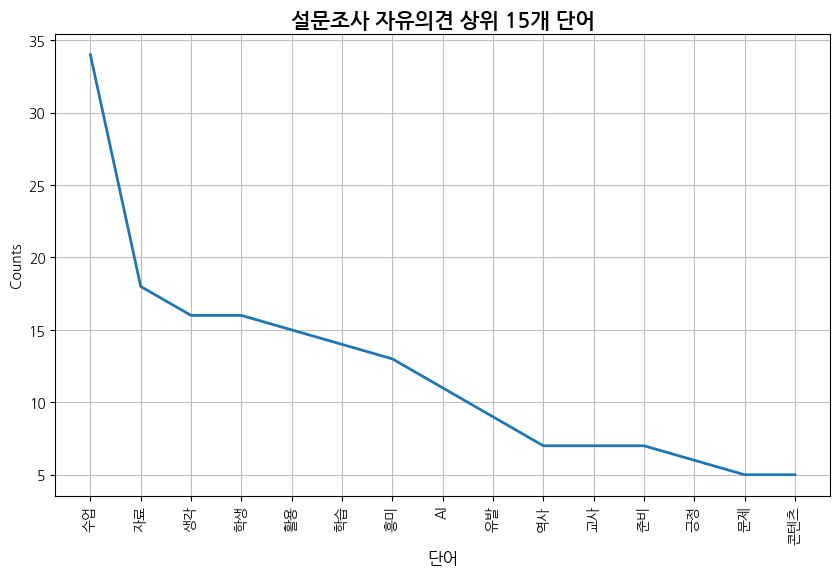

In [ ]:
# bar plot 시각화
plt.rcParams['axes.unicode_minus'] = False
word_counted = nltk.Text(word_cleaned)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.title('설문조사 자유의견 상위 15개 단어', fontsize=15, weight='bold')
word_counted.plot(15)
plt.xlabel('단어', fontsize=12)

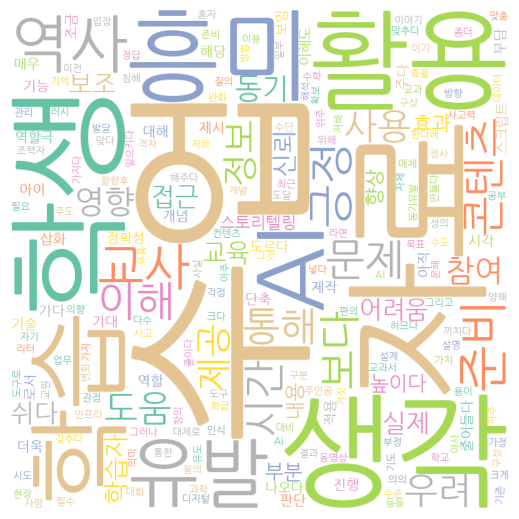

In [ ]:
# 워드클라우드 시각화
word_cloud = WordCloud(
                       font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                       width=800, height=800, # 워드클라우드 크기(해상도)
                       prefer_horizontal= 0.8, # 가로방향 단어 비율 (0~1)
                       background_color='white',
                       colormap = 'Set2'
                       )

word_cloud.generate_from_frequencies(word_dic)

plt.figure(figsize=(10,5))
plt.imshow(word_cloud) # image show
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()